# Predicting Diabetes using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model that is 
capable of predicting whether or not someone has diabetes based of their medical attributes.

We are going to take this approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experiment

## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## 2. Data

The original data came from the National Institute of Diabetes and Digestive and Kidney 
Diseases.

This is available on Kaggle. https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, I'll pursue this project

## 4. Features 

Information about features of data

**Create data dictionary**
*Information about dataset attributes -

*Pregnancies: To express the Number of pregnancies

*Glucose: To express the Glucose level in blood

*BloodPressure: To express the Blood pressure measurement

*SkinThickness: To express the thickness of the skin

*Insulin: To express the Insulin level in blood

*BMI: To express the Body mass index

*DiabetesPedigreeFunction: To express the Diabetes percentage

*Age: To express the age

*Outcome: To express the final result 1 is Yes and 0 is No 

## Preparing the tools

We are going to use pandas, Matplotlib, and numpy for data anaysis and manipulation

In [5]:
# Import all the tools we need

# Regular EDA plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score,roc_curve

## Load data 

In [6]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration (exploratory data analysis or EDA)

The goal is to find out more about the data and learn

1. What question am i trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get out more of my data?

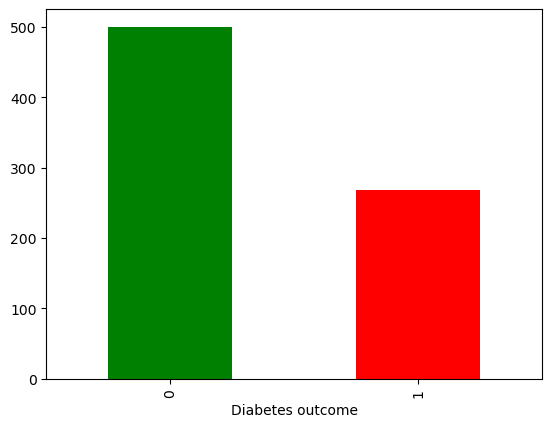

In [7]:
df['Outcome'].value_counts().plot(kind='bar',color=['green','red'],xlabel='Diabetes outcome');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Missing values in data?
df.isna().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Diabetes Frequency regarding number of Pregnancies

In [10]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.Outcome,df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


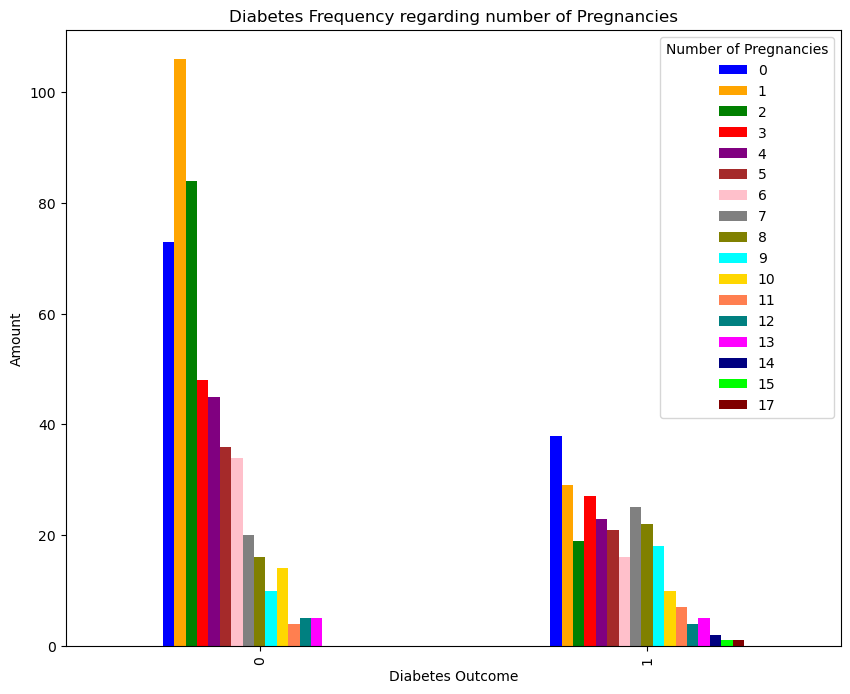

In [12]:
#plot
pd.crosstab(df.Outcome,df.Pregnancies).plot(kind='bar',color=[
    'blue',
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan',
    'gold',
    'coral',
    'teal',
    'magenta',
    'navy',
    'lime',
    'maroon'
],figsize=(10,8))
plt.title('Diabetes Frequency regarding number of Pregnancies');
plt.xlabel('Diabetes Outcome')
plt.ylabel('Amount');
plt.legend(title='Number of Pregnancies');

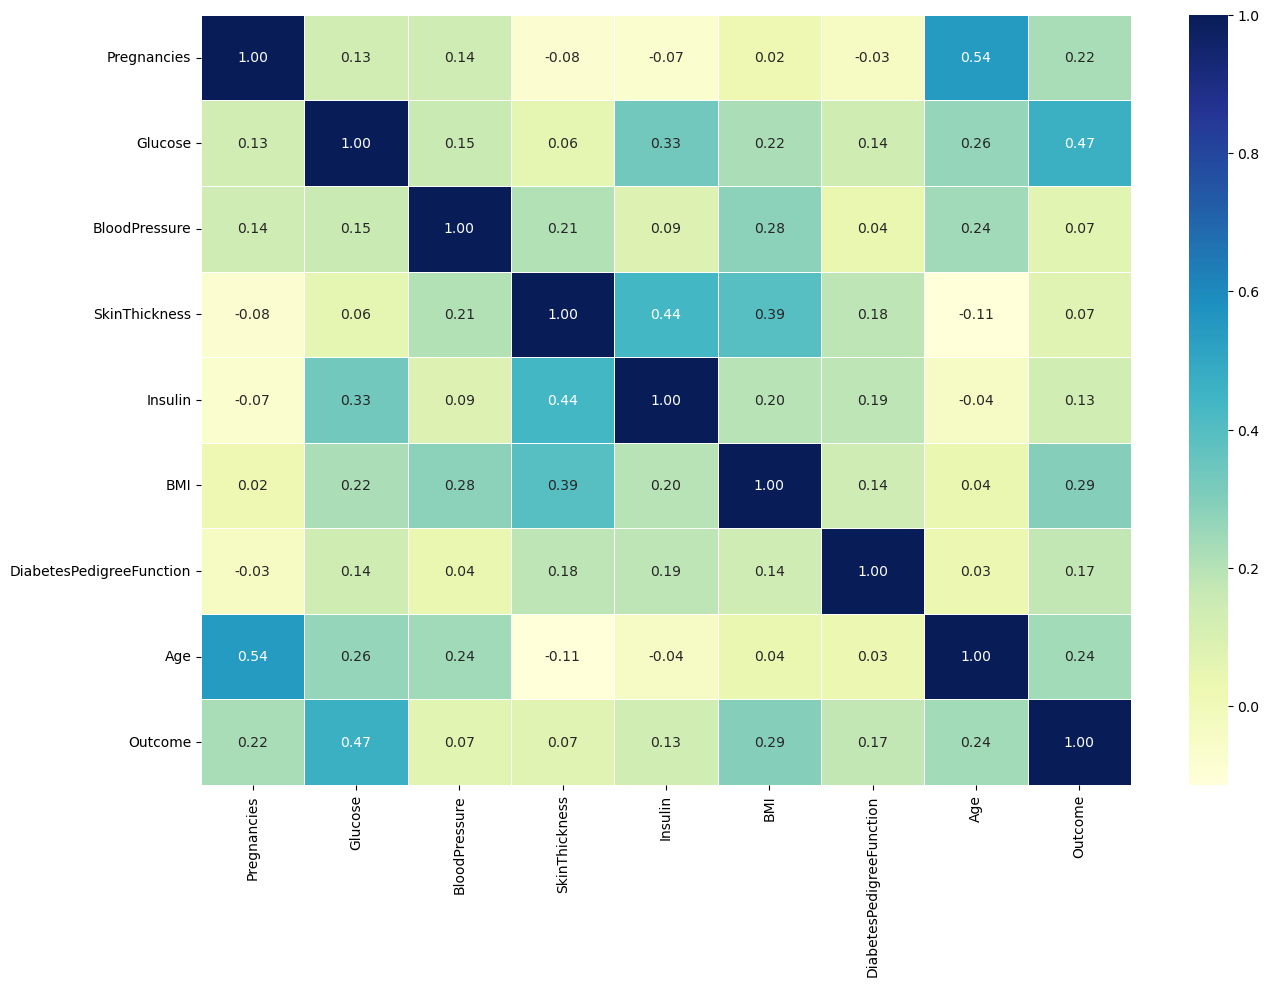

In [13]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu');

### The problem with the dataset


* Some of the values from the data are not realistic. For example, some of the data values show that
 BMI,Insulin,SkinThickness,Glucose, and BloodPressure are 0. 
* Some of the values in pregancies, it's quite unrealistic. 
* I think that this is either data entry mistake or NaN value but it's saved as 0

* Based on my decision, I'm going to replace 0s with NaN.
* After replacing datas to NaN, I decided to impute them with average values of their features
 

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df[['BMI','Insulin','SkinThickness','Glucose','BloodPressure']] = df[['BMI','Insulin','SkinThickness','Glucose','BloodPressure']].replace(0,np.nan)
av_imputer = SimpleImputer(strategy='median')
av_features = ['BMI','Insulin','SkinThickness','Glucose','BloodPressure']
imputer = ColumnTransformer(transformers=[('av_imputer',av_imputer,av_features)],remainder='passthrough')
#spliting the data
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# train and test set
np.random.seed(20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
df_imputed = pd.DataFrame(imputer.transform(df.drop('Outcome', axis=1)), columns=X.columns)
filled_X_train

array([[2.53e+01, 7.00e+01, 1.20e+01, ..., 1.00e+00, 6.58e-01, 2.80e+01],
       [3.09e+01, 1.30e+02, 1.50e+01, ..., 3.00e+00, 2.99e-01, 3.40e+01],
       [3.25e+01, 1.25e+02, 2.90e+01, ..., 3.00e+00, 2.70e-01, 3.90e+01],
       ...,
       [2.52e+01, 5.60e+01, 3.20e+01, ..., 2.00e+00, 1.28e-01, 2.10e+01],
       [2.89e+01, 1.25e+02, 2.90e+01, ..., 4.00e+00, 1.26e-01, 2.40e+01],
       [3.04e+01, 1.25e+02, 2.90e+01, ..., 9.00e+00, 3.02e-01, 4.90e+01]])

In [15]:
df_imputed['Outcome'] = df['Outcome'].values
df_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,33.6,125.0,35.0,148.0,72.0,6.0,0.627,50.0,1
1,26.6,125.0,29.0,85.0,66.0,1.0,0.351,31.0,0
2,23.3,125.0,29.0,183.0,64.0,8.0,0.672,32.0,1
3,28.1,94.0,23.0,89.0,66.0,1.0,0.167,21.0,0
4,43.1,168.0,35.0,137.0,40.0,0.0,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,32.9,180.0,48.0,101.0,76.0,10.0,0.171,63.0,0
764,36.8,125.0,27.0,122.0,70.0,2.0,0.340,27.0,0
765,26.2,112.0,23.0,121.0,72.0,5.0,0.245,30.0,0
766,30.1,125.0,29.0,126.0,60.0,1.0,0.349,47.0,1


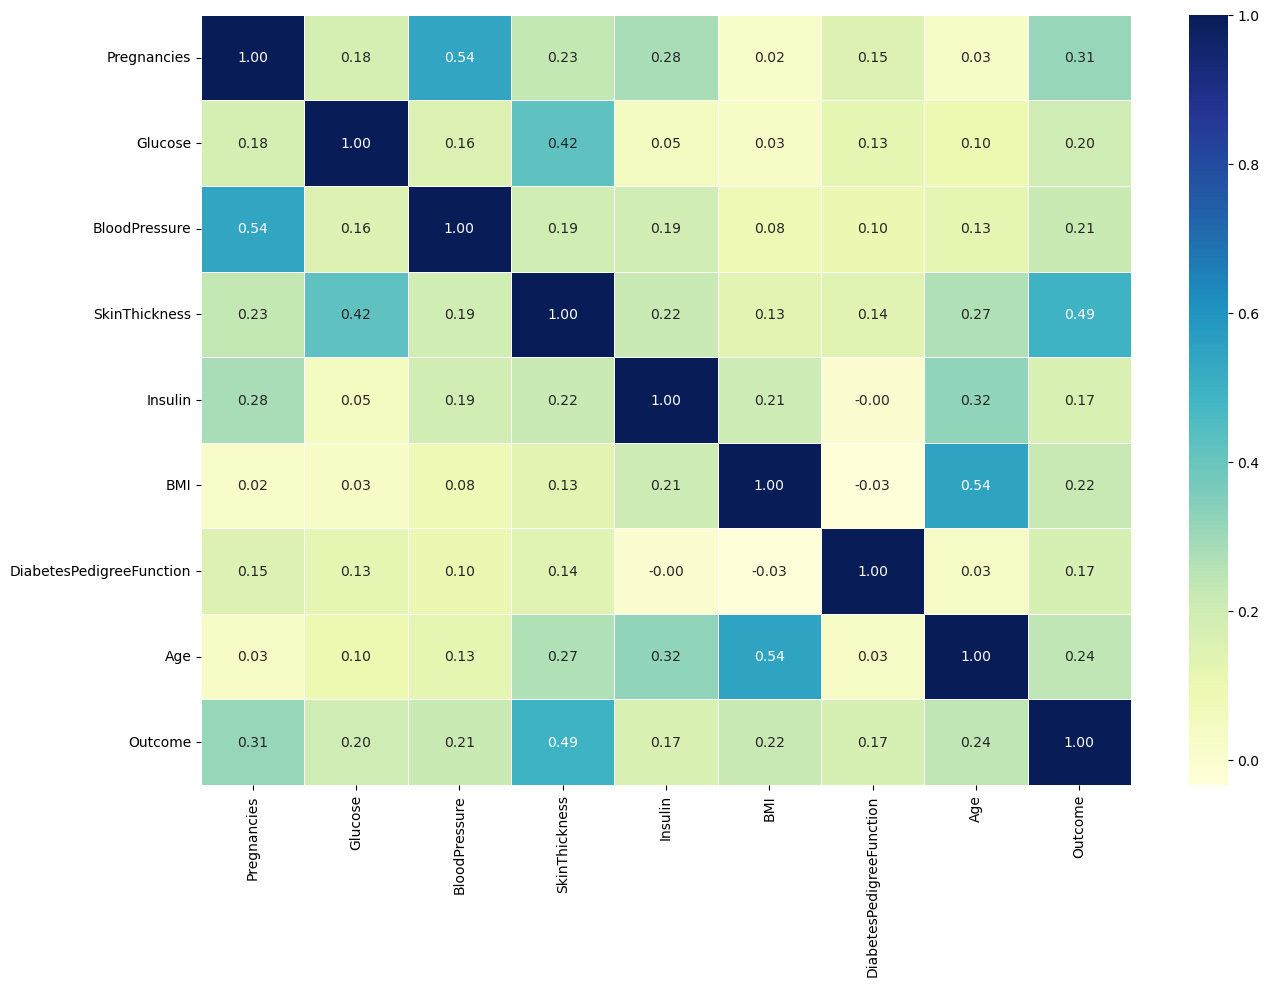

In [16]:
#correlation matrix again after replacing
corr_matrix = df_imputed.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap='YlGnBu');

### Comparative Analysis of Skin Thickness with Various Health Indicators

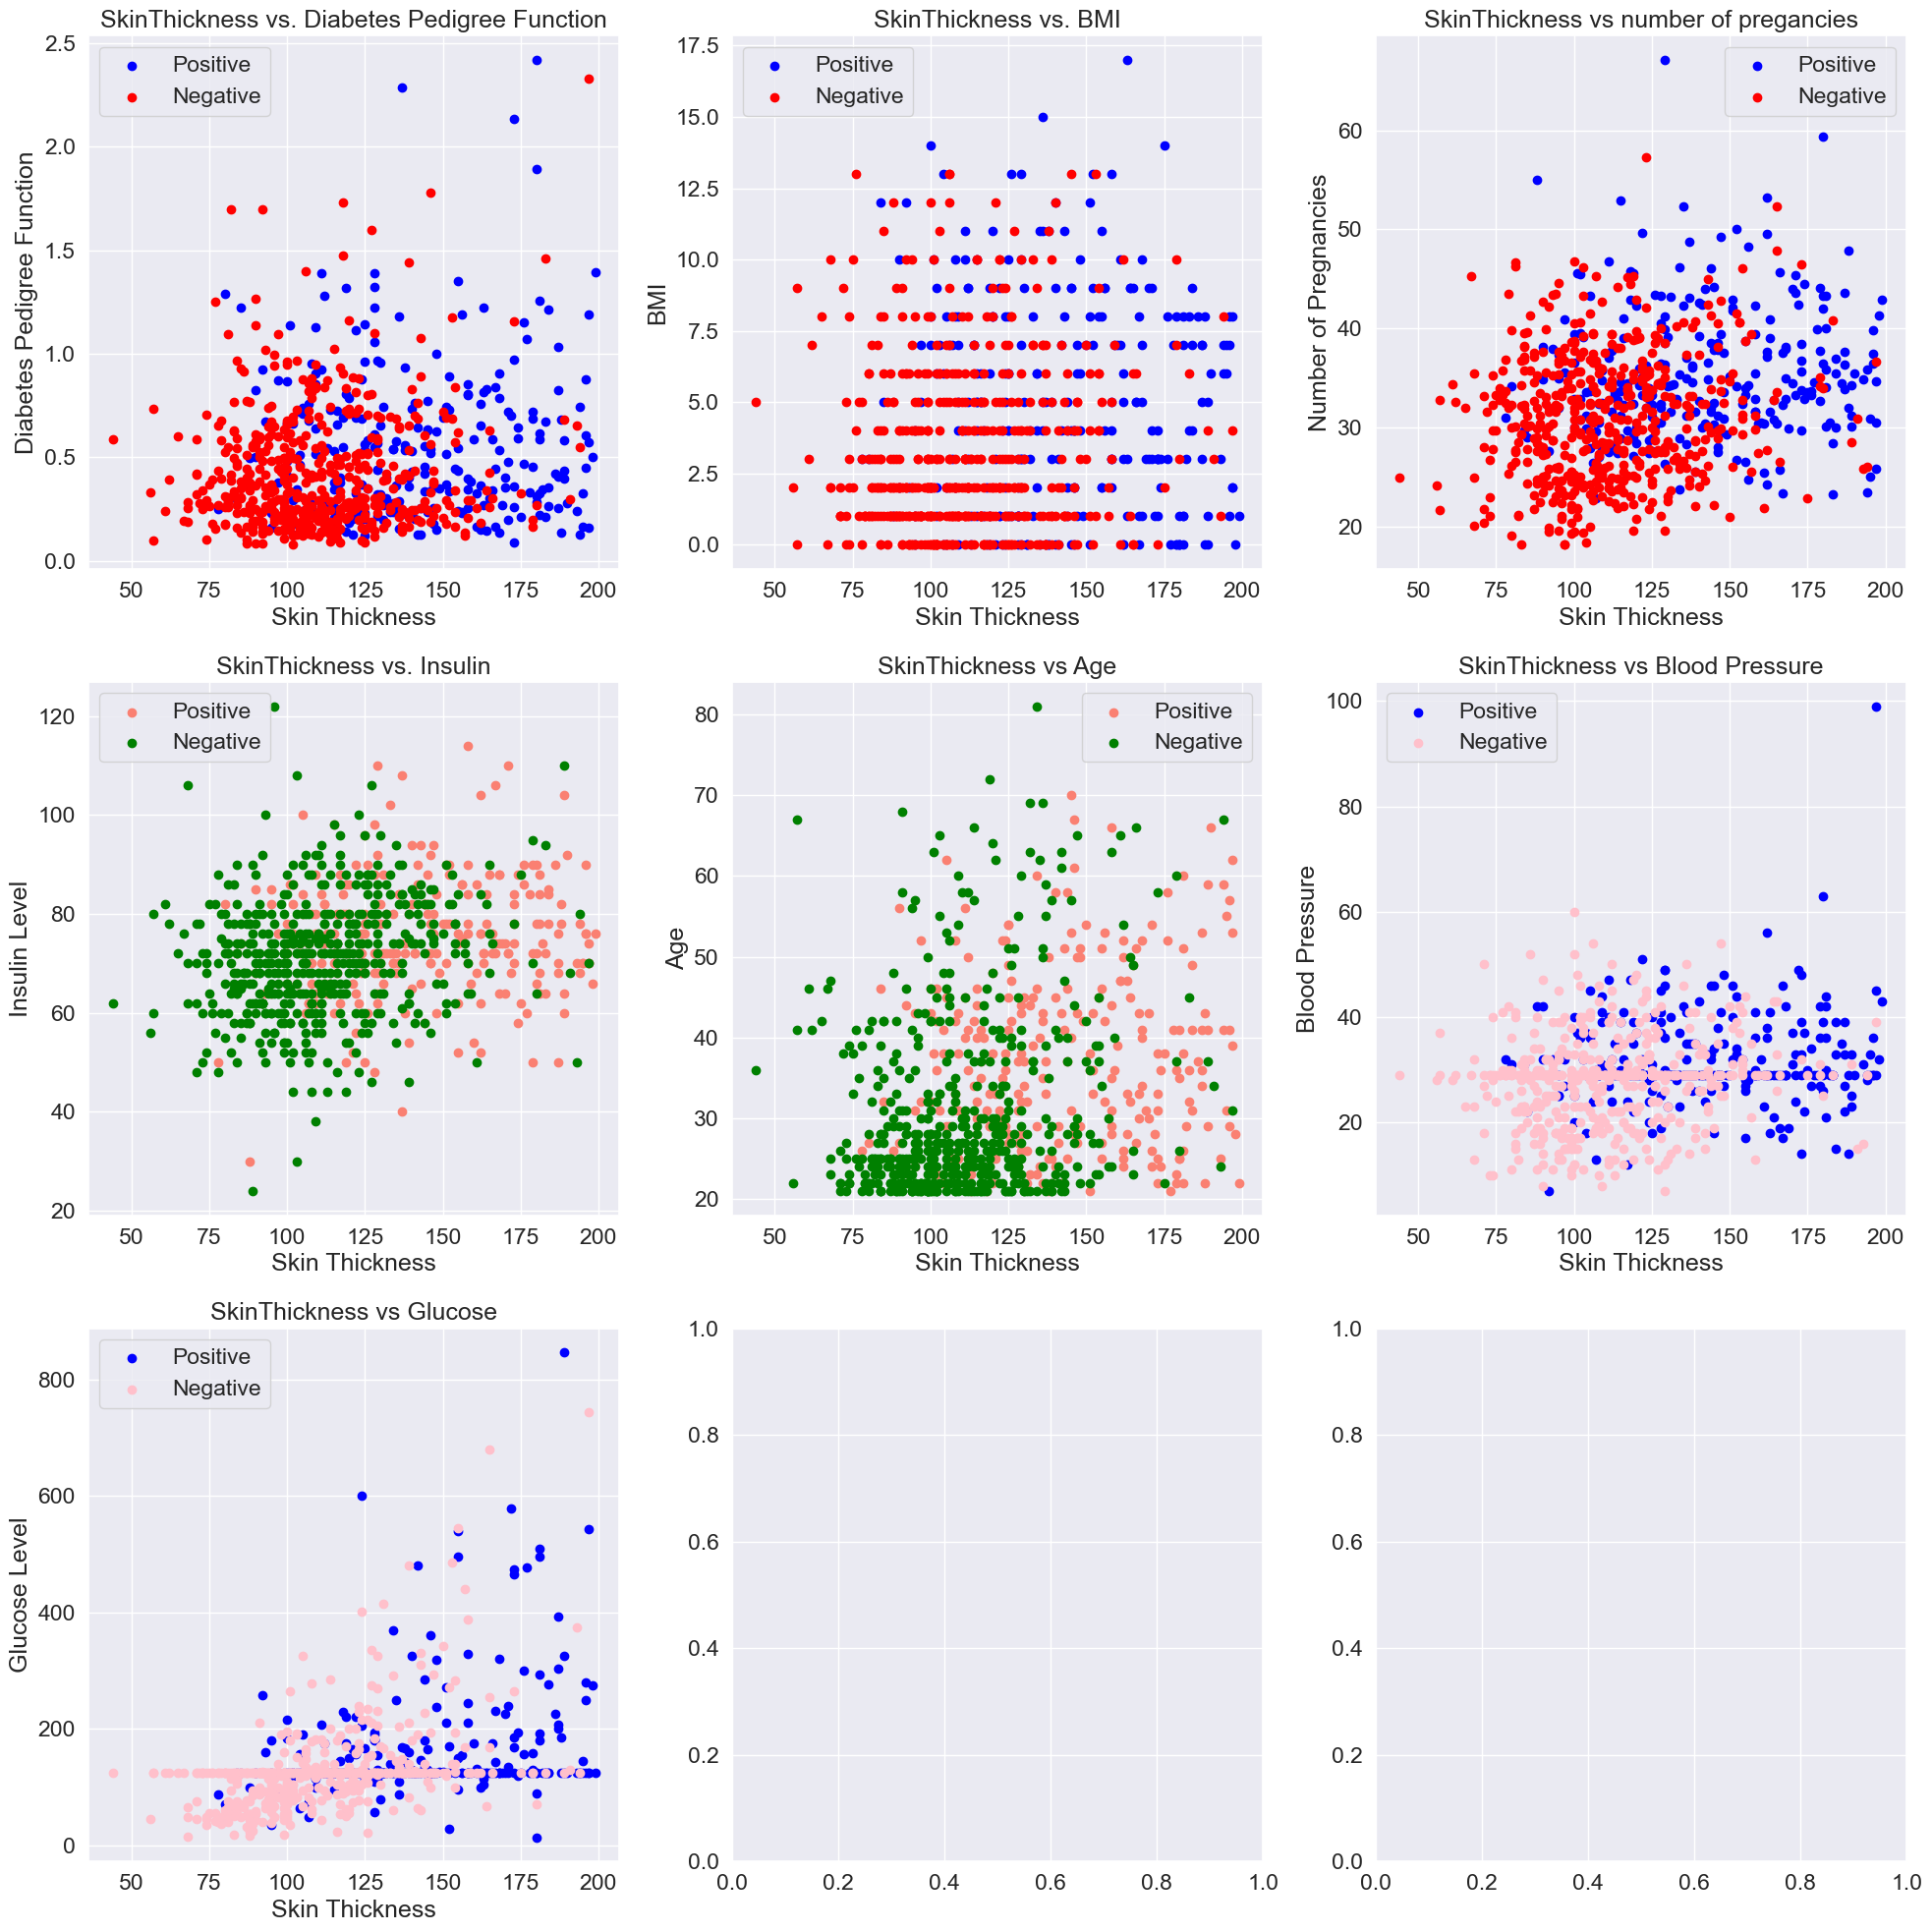

In [98]:
fig, ax = plt.subplots(3,3,figsize=(20,20))

# SkinThickness vs Diabetes Pedigree Function
ax[0,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome==1],df_imputed.DiabetesPedigreeFunction[df_imputed.Outcome==1],color='blue')
ax[0,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome==0],df_imputed.DiabetesPedigreeFunction[df_imputed.Outcome==0],color='red')
ax[0,0].set_title('SkinThickness vs. Diabetes Pedigree Function')
ax[0,0].set_xlabel('Skin Thickness')
ax[0,0].set_ylabel('Diabetes Pedigree Function')
ax[0,0].legend(['Positive','Negative'])

# SkinThickness vs BMI
ax[0,1].scatter(df_imputed.SkinThickness[df_imputed.Outcome==1],df_imputed.BMI[df_imputed.Outcome==1],color='blue')
ax[0,1].scatter(df_imputed.SkinThickness[df_imputed.Outcome==0],df_imputed.BMI[df_imputed.Outcome==0],color='red')
ax[0,1].set_title('SkinThickness vs. BMI')
ax[0,1].set_xlabel('Skin Thickness')
ax[0,1].set_ylabel('BMI')
ax[0,1].legend(['Positive','Negative'])

# SkinThickness vs Pregnancies
ax[0,2].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 1],df_imputed.Pregnancies[df_imputed.Outcome == 1],color='blue')
ax[0,2].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 0],df_imputed.Pregnancies[df_imputed.Outcome == 0],color='red')
ax[0,2].set_title('SkinThickness vs number of pregancies')
ax[0,2].set_xlabel('Skin Thickness')
ax[0,2].set_ylabel('Number of Pregnancies')
ax[0,2].legend(['Positive','Negative'])

# SkinThickness vs Insulin
ax[1,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome==1],df_imputed.Insulin[df_imputed.Outcome==1],color='salmon')
ax[1,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome==0],df_imputed.Insulin[df_imputed.Outcome==0],color='green')
ax[1,0].set_title('SkinThickness vs. Insulin')
ax[1,0].set_xlabel('Skin Thickness')
ax[1,0].set_ylabel('Insulin Level')
ax[1,0].legend(['Positive','Negative'])

# SkinThickness vs Age
ax[1,1].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 1],df_imputed.Age[df_imputed.Outcome == 1],color='salmon')
ax[1,1].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 0],df_imputed.Age[df_imputed.Outcome == 0],color='green')
ax[1,1].set_title('SkinThickness vs Age')
ax[1,1].set_xlabel('Skin Thickness')
ax[1,1].set_ylabel('Age')
ax[1,1].legend(['Positive','Negative'])

# SkinThickness vs Blood Pressure
ax[1,2].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 1],df_imputed.BloodPressure[df_imputed.Outcome == 1],color='blue')
ax[1,2].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 0],df_imputed.BloodPressure[df_imputed.Outcome == 0],color='pink')
ax[1,2].set_title('SkinThickness vs Blood Pressure')
ax[1,2].set_xlabel('Skin Thickness')
ax[1,2].set_ylabel('Blood Pressure')
ax[1,2].legend(['Positive','Negative'])

# SkinThickness vs Glucose
ax[2,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 1],df_imputed.Glucose[df_imputed.Outcome == 1],color='blue')
ax[2,0].scatter(df_imputed.SkinThickness[df_imputed.Outcome == 0],df_imputed.Glucose[df_imputed.Outcome == 0],color='pink')
ax[2,0].set_title('SkinThickness vs Glucose')
ax[2,0].set_xlabel('Skin Thickness')
ax[2,0].set_ylabel('Glucose Level')
ax[2,0].legend(['Positive','Negative'])

plt.tight_layout()
plt.show()



### Modeling

I'm going to try 3 different models for this classification

1. Logistic Regression
2. K-nearest Neighbors classifier
3. Random Forest Classifier


In [99]:
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest Classifier':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fits and scores the models
    """
    np.random.seed(20)
    track_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        track_scores[name] = model.score(X_test,y_test)
    return track_scores

In [100]:
model_scores = fit_and_score(models,filled_X_train,filled_X_test,y_train,y_test)
model_scores

C:\Users\rudgu\Desktop\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7402597402597403,
 'KNN': 0.7337662337662337,
 'Random Forest Classifier': 0.7467532467532467}

### Model comparision


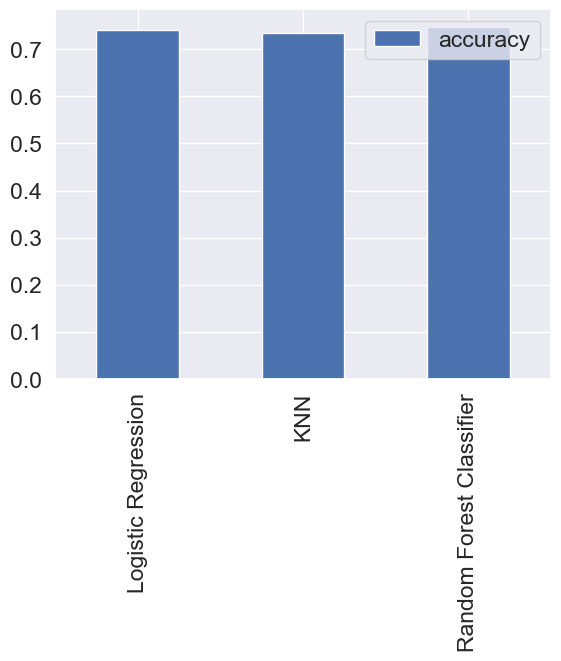

In [101]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

* Hyperparameter tuning 
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [102]:
# KNN

train_scores = []
test_score = []

neighbors =range(1,21)

knn = KNeighborsClassifier()

#loop different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit
    knn.fit(filled_X_train,y_train)
    #Update train scores
    train_scores.append(knn.score(filled_X_train,y_train))
    #updata test scores
    test_score.append(knn.score(filled_X_test,y_test))

Maximum KNN score on the test data:78.57%


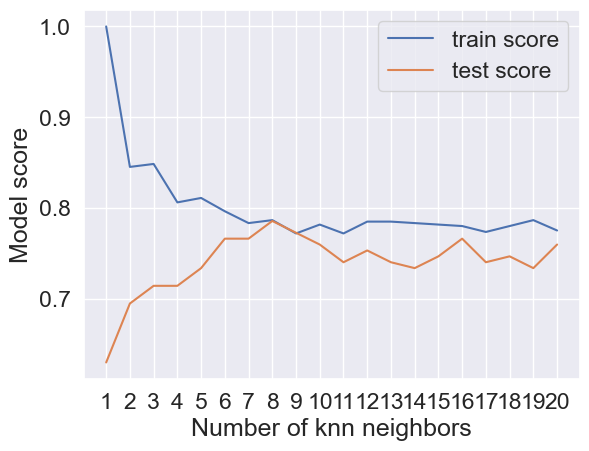

In [103]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_score,label='test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of knn neighbors')
plt.ylabel('Model score')
plt.legend()
print(f'Maximum KNN score on the test data:{max(test_score) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

In [104]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['liblinear']}
#create hyper parameter grid for randomforest
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [106]:
# Tune Logistic Regression
np.random.seed(20)

#set up 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#fit
rs_log_reg.fit(filled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [107]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [108]:
rs_log_reg.score(filled_X_test,y_test)

0.7532467532467533

** RandomForest **

In [109]:
np.random.seed(20)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(filled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [110]:
rs_rf.score(filled_X_test,y_test) 

0.7337662337662337

In [111]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': None}

* From the results of the experiment with hyperparameters of different models, Logistic Regression model showed the highest score.
* Compared to the baseline, logistic regression model's score is slightly improved
* Compared to the baselibe, Random Forest Classifier's score is improved from 0.71 to 0.74

## Hypertuning with GridSearchCV
since the logistic regression model shows the best result, we'll try to improve model using GridSearchCV


In [112]:
np.random.seed(20)
log_reg_grid = {"C":np.logspace(-4,4,1000),
                "solver":['liblinear']}
#set up
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

#fit 
gs_log_reg.fit(filled_X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.393619...
       6.54358602e+03, 6.66536327e+03, 6.78940681e+03, 6.91575883e+03,
       7.04446228e+03, 7.17556092e+03, 7.30909933e+03, 7.44512291e+03,
       7.58367791e+03, 7.72481145e+03, 7.86857151e+03, 8.01500696e+03,
       8.16416760e+03, 8.31610415e+03, 8.47086827e+03, 8.62851257e+03,
       8.78909065e+03, 8.95265713e+03, 9.11926760e+03, 9.28897872e+03,
       9.46184819e+03, 9.63793480e+03, 9.81729841e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [113]:
gs_log_reg.best_params_

{'C': 46.737951079924635, 'solver': 'liblinear'}

In [114]:
gs_log_reg.score(filled_X_test,y_test)

0.7532467532467533

After tuning hyperparameters with GridSearchCV, we got into the conclusion that **gs_log_reg** has the highest score of approximately 76%

## Evaluation of tuned machine learning classifier

* ROC curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used

In [115]:
y_preds = gs_log_reg.predict(filled_X_test)

In [116]:
y_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

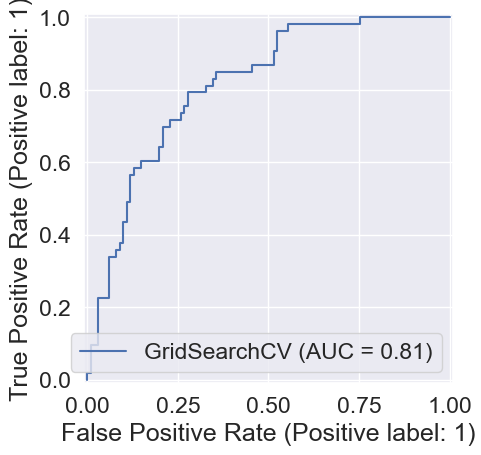

In [117]:
#ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg,filled_X_test,y_test);

In [118]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[89 12]
 [26 27]]


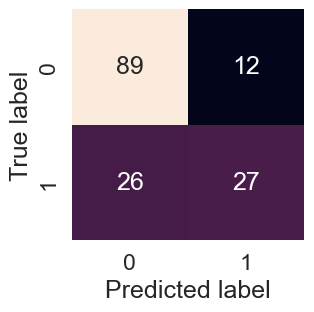

In [119]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

We have ROC curve and AUC matrix and a confusion matrix, it is time for a classification report and cross-validated precision, recall
and f1-score

## Classification Report

In [120]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       101
           1       0.69      0.51      0.59        53

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



## Calculating evaluation metrics with Cross-Valiation

In [121]:
gs_log_reg.best_params_

{'C': 46.737951079924635, 'solver': 'liblinear'}

In [123]:
clf = LogisticRegression(C=46.737951079924635,solver='liblinear')

In [124]:
cv_accuracy = cross_val_score(clf,filled_X_test,y_test,scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.7139784946236559

In [125]:
cv_precision = cross_val_score(clf,filled_X_test,y_test,scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.667142857142857

In [126]:
cv_recall = cross_val_score(clf,filled_X_test,y_test,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.39636363636363636

In [127]:
cv_f1 = cross_val_score(clf,filled_X_test,y_test,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.48571428571428577

In [135]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score
import numpy as np

# Custom threshold scoring function for recall
def custom_recall_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)[:, 1]
    y_pred_adjusted = np.where(y_proba >= 0.31, 1, 0)
    return recall_score(y, y_pred_adjusted)

# Custom threshold scoring function for precision
def custom_precision_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)[:, 1]
    y_pred_adjusted = np.where(y_proba >= 0.31, 1, 0)
    return precision_score(y, y_pred_adjusted)

# Custom threshold scoring function for F1 score
def custom_f1_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)[:, 1]
    y_pred_adjusted = np.where(y_proba >= 0.31, 1, 0)
    return f1_score(y, y_pred_adjusted)
def custom_acc_scorer(estimator,X,y):
    y_proba = estimator.predict_proba(X)[:,1]
    y_pred_adjusted = np.where(y_proba >= 0.31,1,0)
    return accuracy_score(y,y_pred_adjusted)

# Logistic Regression Model
clf2 = LogisticRegression(C=46.737951079924635, solver='liblinear')

# Perform cross-validation using cross_validate and custom scoring functions
cv_results = cross_validate(clf2, filled_X_train, y_train, cv=5,
                            scoring={'recall': custom_recall_scorer,
                                     'precision': custom_precision_scorer,
                                     'f1': custom_f1_scorer,
                                     'accuracy':custom_acc_scorer},
                            return_train_score=False)

# Output cross-validation results for each metric
print("Cross-validation recall scores:", cv_results['test_recall'])
print("Mean recall score:", np.mean(cv_results['test_recall']))
print("Cross-validation precision scores:", cv_results['test_precision'])
print("Mean precision score:", np.mean(cv_results['test_precision']))
print("Cross-validation F1 scores:", cv_results['test_f1'])
print("Mean F1 score:", np.mean(cv_results['test_f1']))
print("Cross-validation Accuracy scores:", cv_results['test_accuracy'])
print("Mean accuracy score:", np.mean(cv_results['test_accuracy']))

Cross-validation recall scores: [0.8372093  0.81395349 0.76744186 0.69767442 0.76744186]
Mean recall score: 0.7767441860465116
Cross-validation precision scores: [0.61016949 0.61403509 0.67346939 0.57692308 0.52380952]
Mean precision score: 0.5996813135464849
Cross-validation F1 scores: [0.70588235 0.7        0.7173913  0.63157895 0.62264151]
Mean F1 score: 0.6754988228182771
Cross-validation Accuracy scores: [0.75609756 0.75609756 0.78861789 0.71544715 0.67213115]
Mean accuracy score: 0.7376782620285219


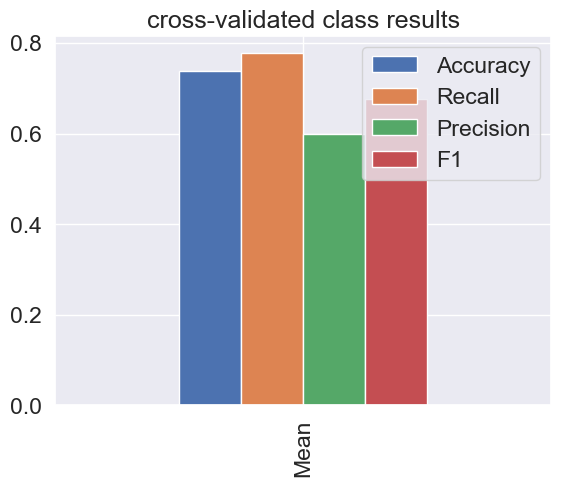

In [136]:
# visuaize the results
cv_metrics = pd.DataFrame({
    'Accuracy': [np.mean(cv_results['test_accuracy'])],
    'Recall': [np.mean(cv_results['test_recall'])],
    'Precision': [np.mean(cv_results['test_precision'])],
    'F1': [np.mean(cv_results['test_f1'])]
}, index=['Mean'])

# Display the DataFrame
cv_metrics.plot.bar(title='cross-validated class results');


### Feature Importance

In [17]:
clf = LogisticRegression(C=46.737951079924635,solver='liblinear')
clf.fit(filled_X_train,y_train);

In [18]:
clf.coef_

array([[ 0.10181377, -0.00200454,  0.0104329 ,  0.03810334, -0.01722168,
         0.14577491,  0.9218004 ,  0.01148255]])

In [19]:
feature_dict = dict(zip(df_imputed.columns,list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.10181377057296748,
 'Glucose': -0.002004535809989806,
 'BloodPressure': 0.010432900310546861,
 'SkinThickness': 0.03810333794148922,
 'Insulin': -0.01722168209844729,
 'BMI': 0.14577490997675568,
 'DiabetesPedigreeFunction': 0.921800402482103,
 'Age': 0.011482552588499164}

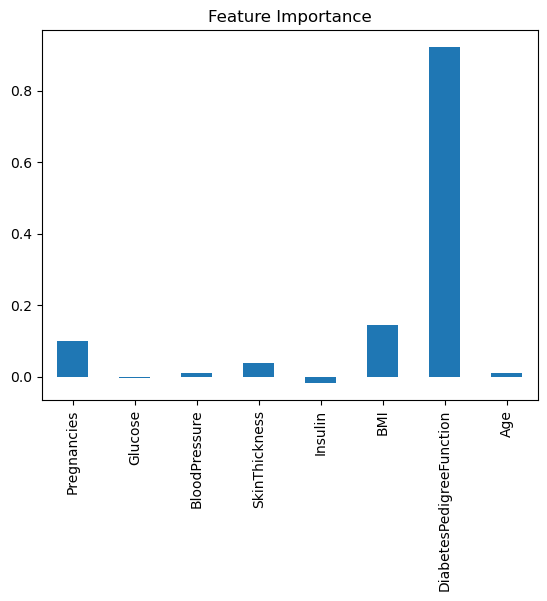

In [20]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);

In [21]:
threshold = 2.0

# Filter the DataFrame where DiabetesPedigreeFunction is greater than the threshold
filtered_df = df_imputed[df_imputed['DiabetesPedigreeFunction'] > threshold]

# Create a cross-tabulation for the filtered data
outcome_counts = filtered_df['Outcome'].value_counts()

# Display the count of outcomes
outcome_counts

Outcome
1    3
0    1
Name: count, dtype: int64

## 6.Experimentation 

From here, there are a few options since we could not reach the goal
- Collecting more data
- Trying a better model
- Improving the current model

In [28]:
import pickle
#Save the model
with open("./log_gs_diabetes_model_1.pkl", "wb") as f:
  pickle.dump(clf, f)